# HOME CREDIT PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Load data

In [5]:
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), int64(1), object(16)
memory usage: 1.8+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(2), object(16)
memory usage: 3.6+ MB


In [11]:
train['TARGET'].isna().values.any()

True

In [12]:
print(train.shape)
print(test.shape)

(1923, 122)
(3850, 121)


## Exploratory data analysis

In [13]:
train.isnull().sum()

SK_ID_CURR                      0
TARGET                          1
NAME_CONTRACT_TYPE              1
CODE_GENDER                     1
FLAG_OWN_CAR                    1
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     281
AMT_REQ_CREDIT_BUREAU_WEEK    281
AMT_REQ_CREDIT_BUREAU_MON     281
AMT_REQ_CREDIT_BUREAU_QRT     281
AMT_REQ_CREDIT_BUREAU_YEAR    281
Length: 122, dtype: int64

In [14]:
train.isna().any()

SK_ID_CURR                    False
TARGET                         True
NAME_CONTRACT_TYPE             True
CODE_GENDER                    True
FLAG_OWN_CAR                   True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [15]:
print('sum of train data ', len(train))
print('sum of test data ', len(test))

sum of train data  1923
sum of test data  3850


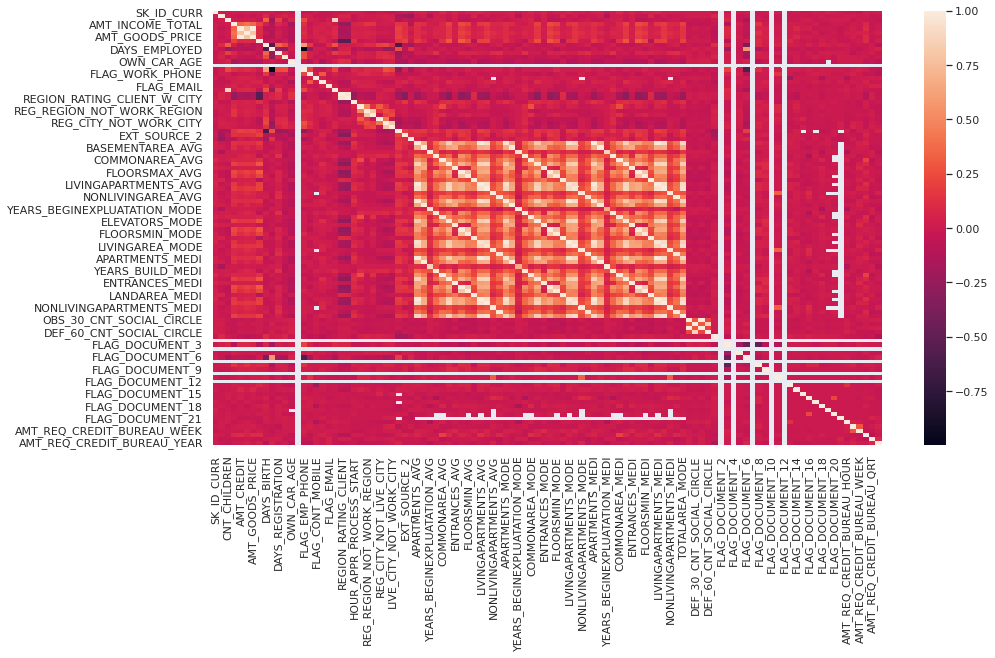

In [16]:
sns.set(rc = {'figure.figsize':(15, 8)})
sns.heatmap(train.corr())

In [17]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,1923.000000,1922.000000,1922.000000,1.922000e+03,1.922000e+03,1922.000000,1.921000e+03,1922.000000,1922.000000,1922.000000,...,1922.000000,1922.000000,1922.00000,1922.00000,1642.000000,1642.000000,1642.000000,1642.00000,1642.000000,1642.000000
mean,101073.460738,0.072841,0.403226,1.699198e+05,5.990206e+05,27201.308273,5.400030e+05,0.021215,-15901.878252,60561.332986,...,0.007284,0.001041,0.00052,0.00052,0.009135,0.007308,0.031669,0.25944,0.299635,1.940317
std,2173.222166,0.259943,0.706370,1.016418e+05,3.926591e+05,14331.815064,3.620855e+05,0.014029,4272.073889,138515.986992,...,0.085058,0.032250,0.02281,0.02281,0.095170,0.110156,0.185313,0.92084,0.642104,1.877762
min,10225.000000,0.000000,0.000000,2.565000e+04,4.797000e+04,2974.500000,4.500000e+04,0.001276,-25104.000000,-15632.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,100552.000000,0.000000,0.000000,1.125000e+05,2.736360e+05,16733.250000,2.385000e+05,0.010032,-19334.750000,-2710.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,101110.000000,0.000000,0.000000,1.440000e+05,5.212800e+05,25391.250000,4.545000e+05,0.018850,-15767.000000,-1235.500000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000
75%,101693.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34785.000000,6.795000e+05,0.028663,-12313.000000,-320.250000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000
max,102251.000000,1.000000,4.000000,1.935000e+06,2.286212e+06,116505.000000,2.254500e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,3.000000,3.000000,11.00000,4.000000,9.000000


In [68]:
b = (train.TARGET == 1).sum

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


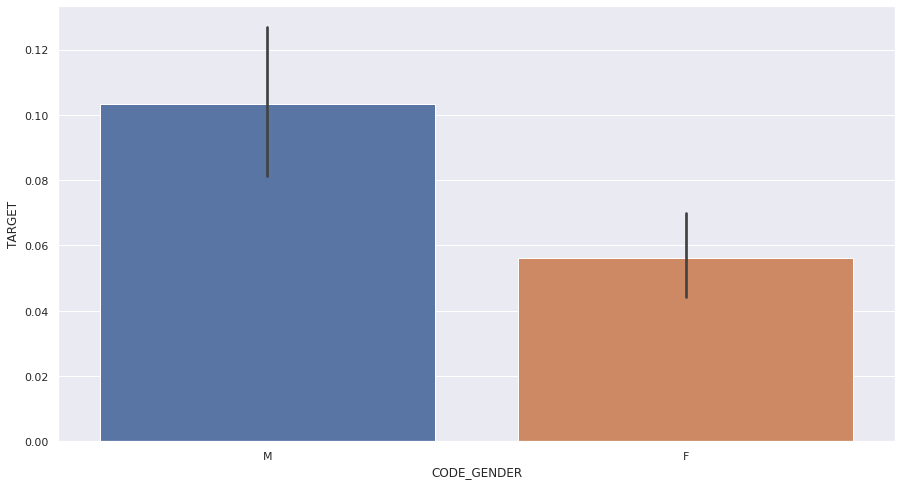

In [70]:
sns.barplot(train.CODE_GENDER, (train.TARGET == 1))
plt.show()

## Data Preparation

### Split data to x and y

In [35]:
x = train.loc[:, train.columns != 'TARGET']
y = train['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1538, 121), (385, 121), (1538,), (385,))

In [37]:
# 307511
# 105059
# 202448
len(x_train.loc[(x_train['CODE_GENDER'] == 'XNA')])

0

In [38]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1538, 385, 1538, 385)

### Filling missing value train data

terdapat banyak data yang mengalami missing value, jadi perlu untuk memperbaikinya, disini diisi dengan nilai tengah dari data

In [39]:
x_train.fillna(x_train.median(), inplace=True)
x_train.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1683,101970,Cash loans,M,Y,N,0.0,315000.0,661702.5,48280.5,598500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
78,100093,Cash loans,F,N,Y,1.0,94500.0,585000.0,28273.5,585000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1126,101316,Cash loans,F,N,Y,0.0,45000.0,254700.0,14751.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1319,101550,Cash loans,F,N,N,1.0,180000.0,540000.0,16501.5,540000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1167,101376,Cash loans,F,N,N,0.0,135000.0,582228.0,18778.5,486000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1616,101895,Cash loans,F,N,Y,0.0,157500.0,675000.0,28507.5,675000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
660,100759,Cash loans,M,Y,N,2.0,202500.0,938304.0,50121.0,810000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
358,100412,Cash loans,F,Y,Y,2.0,135000.0,318528.0,25294.5,252000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1504,101769,Revolving loans,M,Y,Y,0.0,1080000.0,180000.0,9000.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,100486,Cash loans,F,N,Y,0.0,58500.0,172021.5,12991.5,148500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


encode data dari data object supaya menjadi kolom yang berbeda dengan pandas

In [40]:
x_trains = pd.get_dummies(x_train)
print(x_trains.shape)
x_trains

(1538, 235)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
1683,101970,0.0,315000.0,661702.5,48280.5,598500.0,0.035792,-9088.0,-2026.0,-3750.0,...,0,0,0,0,0,0,0,0,0,0
78,100093,1.0,94500.0,585000.0,28273.5,585000.0,0.028663,-18253.0,-721.0,-1701.0,...,0,0,0,0,0,0,0,0,0,0
1126,101316,0.0,45000.0,254700.0,14751.0,225000.0,0.009175,-23815.0,365243.0,-188.0,...,0,0,0,0,0,0,1,0,1,0
1319,101550,1.0,180000.0,540000.0,16501.5,540000.0,0.006008,-12117.0,-874.0,-729.0,...,0,0,0,0,0,0,1,0,1,0
1167,101376,0.0,135000.0,582228.0,18778.5,486000.0,0.030755,-20518.0,-4891.0,-3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,100979,0.0,157500.0,450000.0,22500.0,450000.0,0.035792,-17924.0,-1285.0,-4360.0,...,0,0,0,0,0,1,0,0,1,0
1902,102229,0.0,135000.0,509400.0,37197.0,450000.0,0.003069,-18977.0,-6393.0,-1371.0,...,0,0,0,0,0,0,0,0,0,0
1641,101926,0.0,90000.0,254700.0,24939.0,225000.0,0.010147,-24612.0,365243.0,-6850.0,...,0,0,0,0,0,0,1,0,1,0
1804,102110,0.0,135000.0,225000.0,8082.0,225000.0,0.019101,-16107.0,-607.0,-7298.0,...,0,0,0,0,0,0,1,0,1,0


## Modelling

#### Logistic Regression

In [41]:
model_logistic_regression = LogisticRegression(C=0.00001)
model_logistic_regression.fit(x_trains, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1e-05)

In [50]:
def data_test(tested):
    tested.fillna(tested.median(), inplace=True)
    test = pd.get_dummies(tested)
    # test['CODE_GENDER_XNA'] = 0
    # test['NAME_INCOME_TYPE_Maternity leave'] = 0
    # test['NAME_FAMILY_STATUS_Unknown'] = 0
    return test

In [51]:
testing_with_label = data_test(x_test)
testing_no_label = data_test(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [52]:
testing_with_label.shape, testing_no_label.shape

((385, 217), (3850, 237))

In [53]:
predicted_with_data_y = model_logistic_regression.predict(testing_with_label)

predicted_with_data_y

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ORGANIZATION_TYPE_Culture
Feature names seen at fit time, yet now missing:
- HOUSETYPE_MODE_specific housing
- NAME_INCOME_TYPE_Unemployed
- NAME_TYPE_SUITE_Group of people
- OCCUPATION_TYPE_HR staff
- OCCUPATION_TYPE_Waiters/barmen staff
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [54]:
new_predict = pd.DataFrame(testing_with_label['SK_ID_CURR'])
new_predict

,SK_ID_CURR
1099,101278
1593,101865
240,100279
469,100539
1811,102119
...,...
1176,101387
1428,101679
1564,101835
1388,101629


In [55]:
new_predict['Actual_target'] = y_test
new_predict['Predict_target'] = predicted_with_data_y

NameError: ignored

In [ ]:
new_predict

In [ ]:
confusion_matrix(y_test, predicted_with_data_y)

In [ ]:
accuracy_score(y_test, predicted_with_data_y)

In [56]:
predicted_with_no_data_y= model_logistic_regression.predict(testing_no_label)

predicted_with_no_data_y

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- NAME_EDUCATION_TYPE_Academic degree
- NAME_INCOME_TYPE_Businessman
- ORGANIZATION_TYPE_Culture
- ORGANIZATION_TYPE_Industry: type 6
- ORGANIZATION_TYPE_Industry: type 8
- ...
Feature names seen at fit time, yet now missing:
- NAME_INCOME_TYPE_Unemployed
- ORGANIZATION_TYPE_Industry: type 10
- ORGANIZATION_TYPE_Industry: type 13
- ORGANIZATION_TYPE_Trade: type 5

  warnings.warn(message, FutureWarning)


ValueError: ignored

#### ANN

In [ ]:
model_ann = Sequential([
    Dense(1024, activation='relu', input_shape=(245, )),
    tf.keras.layers.Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_ann.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_ann.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              251904    
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 32)                32800     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                

In [ ]:
model_ann.fit(x_trains, y_train, epochs=10, batch_size=500)

Epoch 1/10
493/493 [==============================] - 12s 22ms/step - loss: 137.7319 - accuracy: 0.9121
Epoch 2/10
493/493 [==============================] - 10s 20ms/step - loss: 0.3006 - accuracy: 0.9192
Epoch 3/10
493/493 [==============================] - 10s 21ms/step - loss: 0.2845 - accuracy: 0.9192
Epoch 4/10
493/493 [==============================] - 10s 21ms/step - loss: 0.2829 - accuracy: 0.9192
Epoch 5/10
493/493 [==============================] - 10s 20ms/step - loss: 0.2826 - accuracy: 0.9192
Epoch 6/10
493/493 [==============================] - 10s 20ms/step - loss: 0.2828 - accuracy: 0.9192
Epoch 7/10
493/493 [==============================] - 10s 21ms/step - loss: 0.2826 - accuracy: 0.9192
Epoch 8/10
493/493 [==============================] - 10s 20ms/step - loss: 0.2825 - accuracy: 0.9192
Epoch 9/10
493/493 [==============================] - 10s 20ms/step - loss: 0.2823 - accuracy: 0.9192
Epoch 10/10
493/493 [==============================] - 10s 20ms/step - loss: 0.2

In [ ]:
model_ann.predict(predicted_with_no_data_y)